Upload the files and process the dataframe

Sum up the elements in all sites with *RE*

In [1]:
from utils.preprocess import process_csv

df = process_csv("data/Cd3Y10Ru-hP28_merged.csv")
df

,Filename,Formula,2c,6h (2),RE
0,1722765.cif,Cd3RuTm10,Ru,Cd,Tm3.0
1,1722761.cif,Cd3RuTb10,Ru,Cd,Tb3.0
2,1722767.cif,Cd3RhY10,Rh,Cd,Y3.0
3,1147119.cif,Cd3RhTm10,Rh,Cd,Tm3.0
4,1147127.cif,Cd3PtY10,Pt,Cd,Y3.0
...,...,...,...,...,...
76,1147154.cif,Al3CoTm10,Co,Al,Tm3.0
77,1532710.cif,Al3CoLu10,Co,Al,Lu3.0
78,1147152.cif,Al3CoHo10,Co,Al,Ho3.0
79,1147153.cif,Al3CoEr10,Co,Al,Er3.0


Generate the features for each site

For sites with mixing, weighted features are generated

In [2]:
from utils.feature import process_element_features

element_features_excel = "data/elemental-property-list.xlsx"

# Process the features for each site.
df_site_features = process_element_features(df, element_features_excel)

df_site_features

,Filename,Formula,Site,Site_Label,Atomic weight,Atomic number,Period,Group,quantum number l,Metal(1)/ metalloid(2)/ nonmetal(3),...,DFT RLDA Ekin,DFT RLDA Ecoul,DFT RLDA Eenuc,DFT RLDA Exc,DFT ScRLDA Etot,DFT ScRLDA Ekin,DFT ScRLDA Ecoul,DFT ScRLDA Eenuc,DFT ScRLDA Exc,Neutron Cross Section
0,1722765.cif,Cd3RuTm10,Tm3.0,RE,168.934210,69.0,6.0,3.0,3.0,1.0,...,14952.782514,5325.995668,-33574.513283,-253.523438,-13534.832864,14663.344745,5311.599603,-33257.081306,-252.695905,105.000
1,1722765.cif,Cd3RuTm10,Ru,2c,101.070000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.600
2,1722765.cif,Cd3RuTm10,Cd,6h (2),112.411000,48.0,5.0,12.0,0.0,1.0,...,5839.236393,2265.151850,-13545.979295,-142.057637,-5582.286913,5793.217213,2262.334423,-13496.044867,-141.793682,2450.000
3,1722761.cif,Cd3RuTb10,Tb3.0,RE,158.925340,65.0,6.0,3.0,3.0,1.0,...,12744.671952,4565.424762,-28772.145665,-229.073799,-11681.366585,12532.655261,4554.327455,-28539.978120,-228.371181,23.000
4,1722761.cif,Cd3RuTb10,Ru,2c,101.070000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1147153.cif,Al3CoEr10,Co,2c,58.933200,27.0,4.0,9.0,2.0,1.0,...,1407.710690,592.105098,-3333.731437,-55.780174,-1389.663179,1404.758937,591.861977,-3330.539729,-55.744364,37.200
239,1147153.cif,Al3CoEr10,Al,6h (2),26.981539,13.0,3.0,13.0,1.0,1.0,...,241.729117,112.827267,-578.851985,-17.373722,-241.669101,241.640910,112.816539,-578.755072,-17.371477,0.233
240,1147151.cif,Al3CoDy10,Dy3.0,RE,162.500000,66.0,6.0,3.0,3.0,1.0,...,13272.514677,4747.510671,-29924.229269,-235.053929,-12128.478118,13043.057325,4735.651061,-29672.866007,-234.320497,950.000
241,1147151.cif,Al3CoDy10,Co,2c,58.933200,27.0,4.0,9.0,2.0,1.0,...,1407.710690,592.105098,-3333.731437,-55.780174,-1389.663179,1404.758937,591.861977,-3330.539729,-55.744364,37.200


Running PLS-DA with 2 components

Preprocesing:
 * External scaling - `StandardScaler` and `MinMaxScaler`
 * Without internal scaling

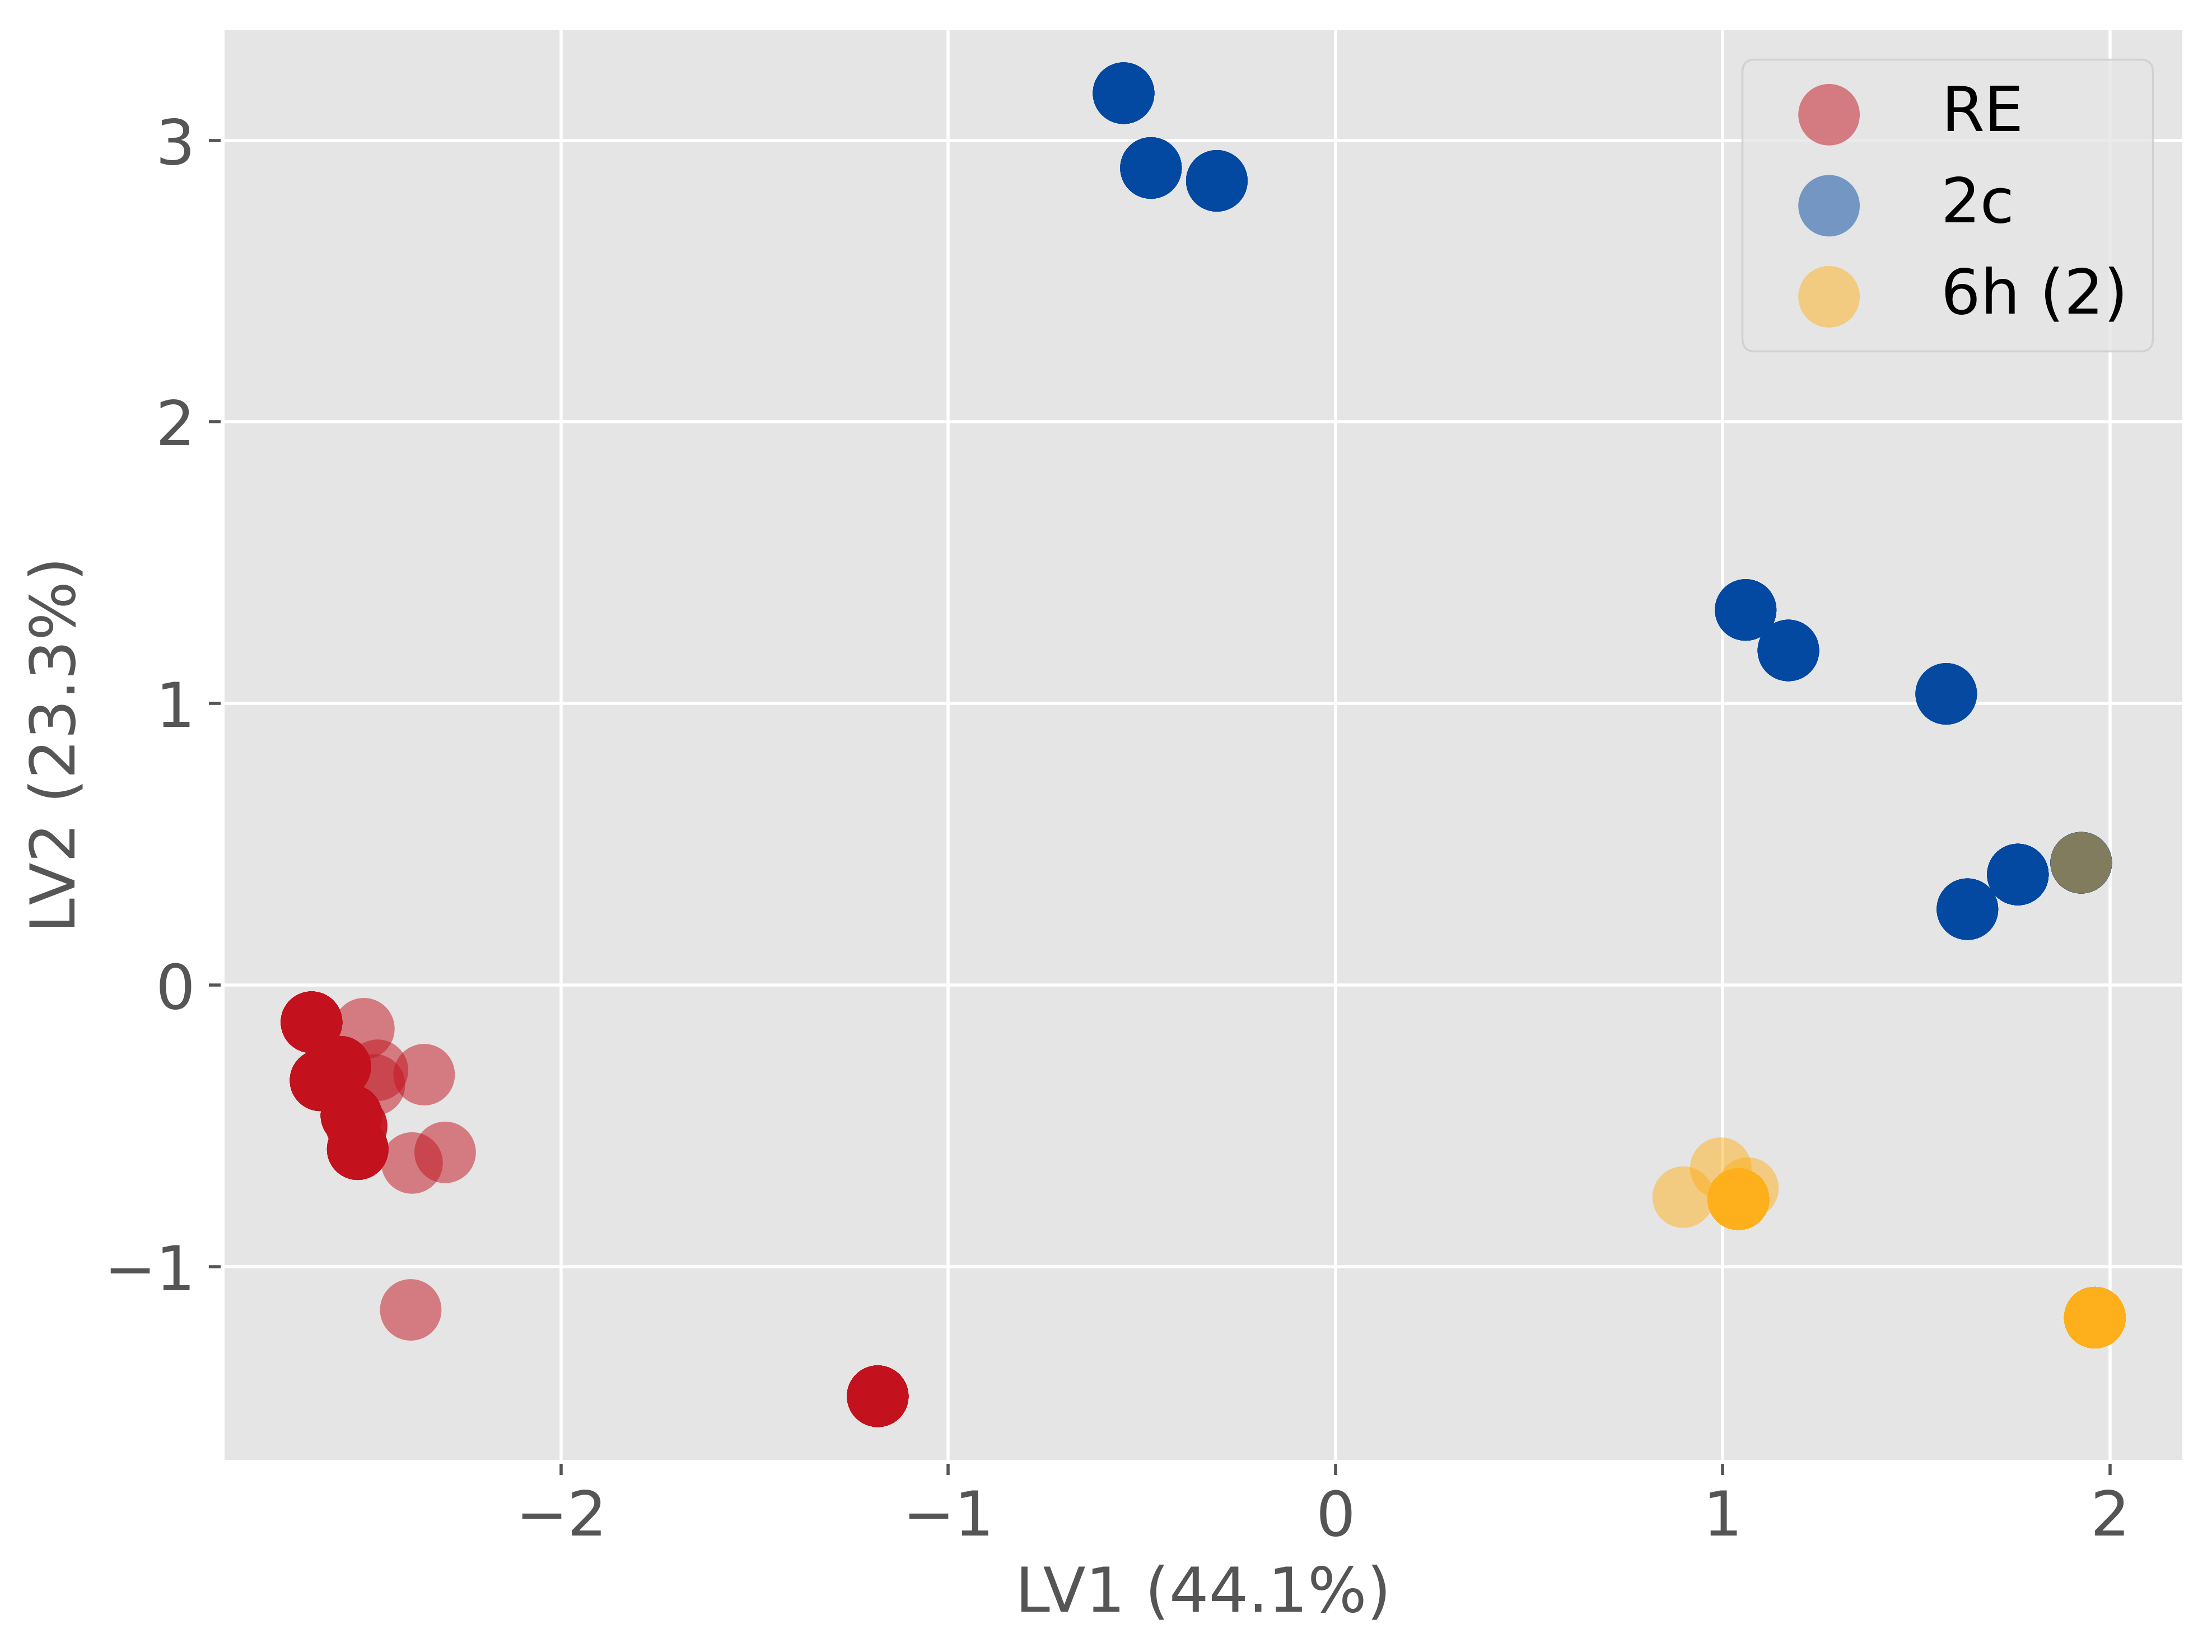

Full loadings saved to PLS_DA_Full_Loadings.xlsx.


In [3]:
from models.plsda import run_pls_da

pls_loadings = run_pls_da(df_site_features)

Common features between property file and PLS‑DA: ['Atomic weight', 'Atomic number', 'Period', 'Group', 'quantum  number l', 'Metal(1)/ metalloid(2)/ nonmetal(3)', 'Mendeleev number', 'Families', 'valence s', 'valence p', 'valence d', 'valence f', 'unfilled s', 'unfilled p', 'unfilled d', 'unfilled f', 'no. of  valence  electrons', 'outer shell electrons', 'Gilman no. of valence electrons', 'Metallic  valence', 'Zeff', '1st Bohr radius (a0)', 'Ionization energy (eV)', 'Electron affinity (ev)', 'Pauling EN', 'Martynov Batsanov EN', 'Mulliken EN', 'Allred EN', 'Allred Rockow EN', 'Nagle EN', 'Ghosh EN', 'Atomic radius calculated', 'Covalent radius', 'Ionic radius', 'Effective ionic radius', 'Miracle radius', 'van der Waals radius', 'Zunger radii sum', 'Crystal radius', 'Covalent CSD radius', 'Slater radius', 'Orbital radius', 'polarizability, A^3', 'Melting point, K', 'Boiling point, K', 'Density,  g/mL', 'Specific heat, J/g K', 'Heat of fusion,  kJ/mol', 'Heat of vaporization,  kJ/mol',

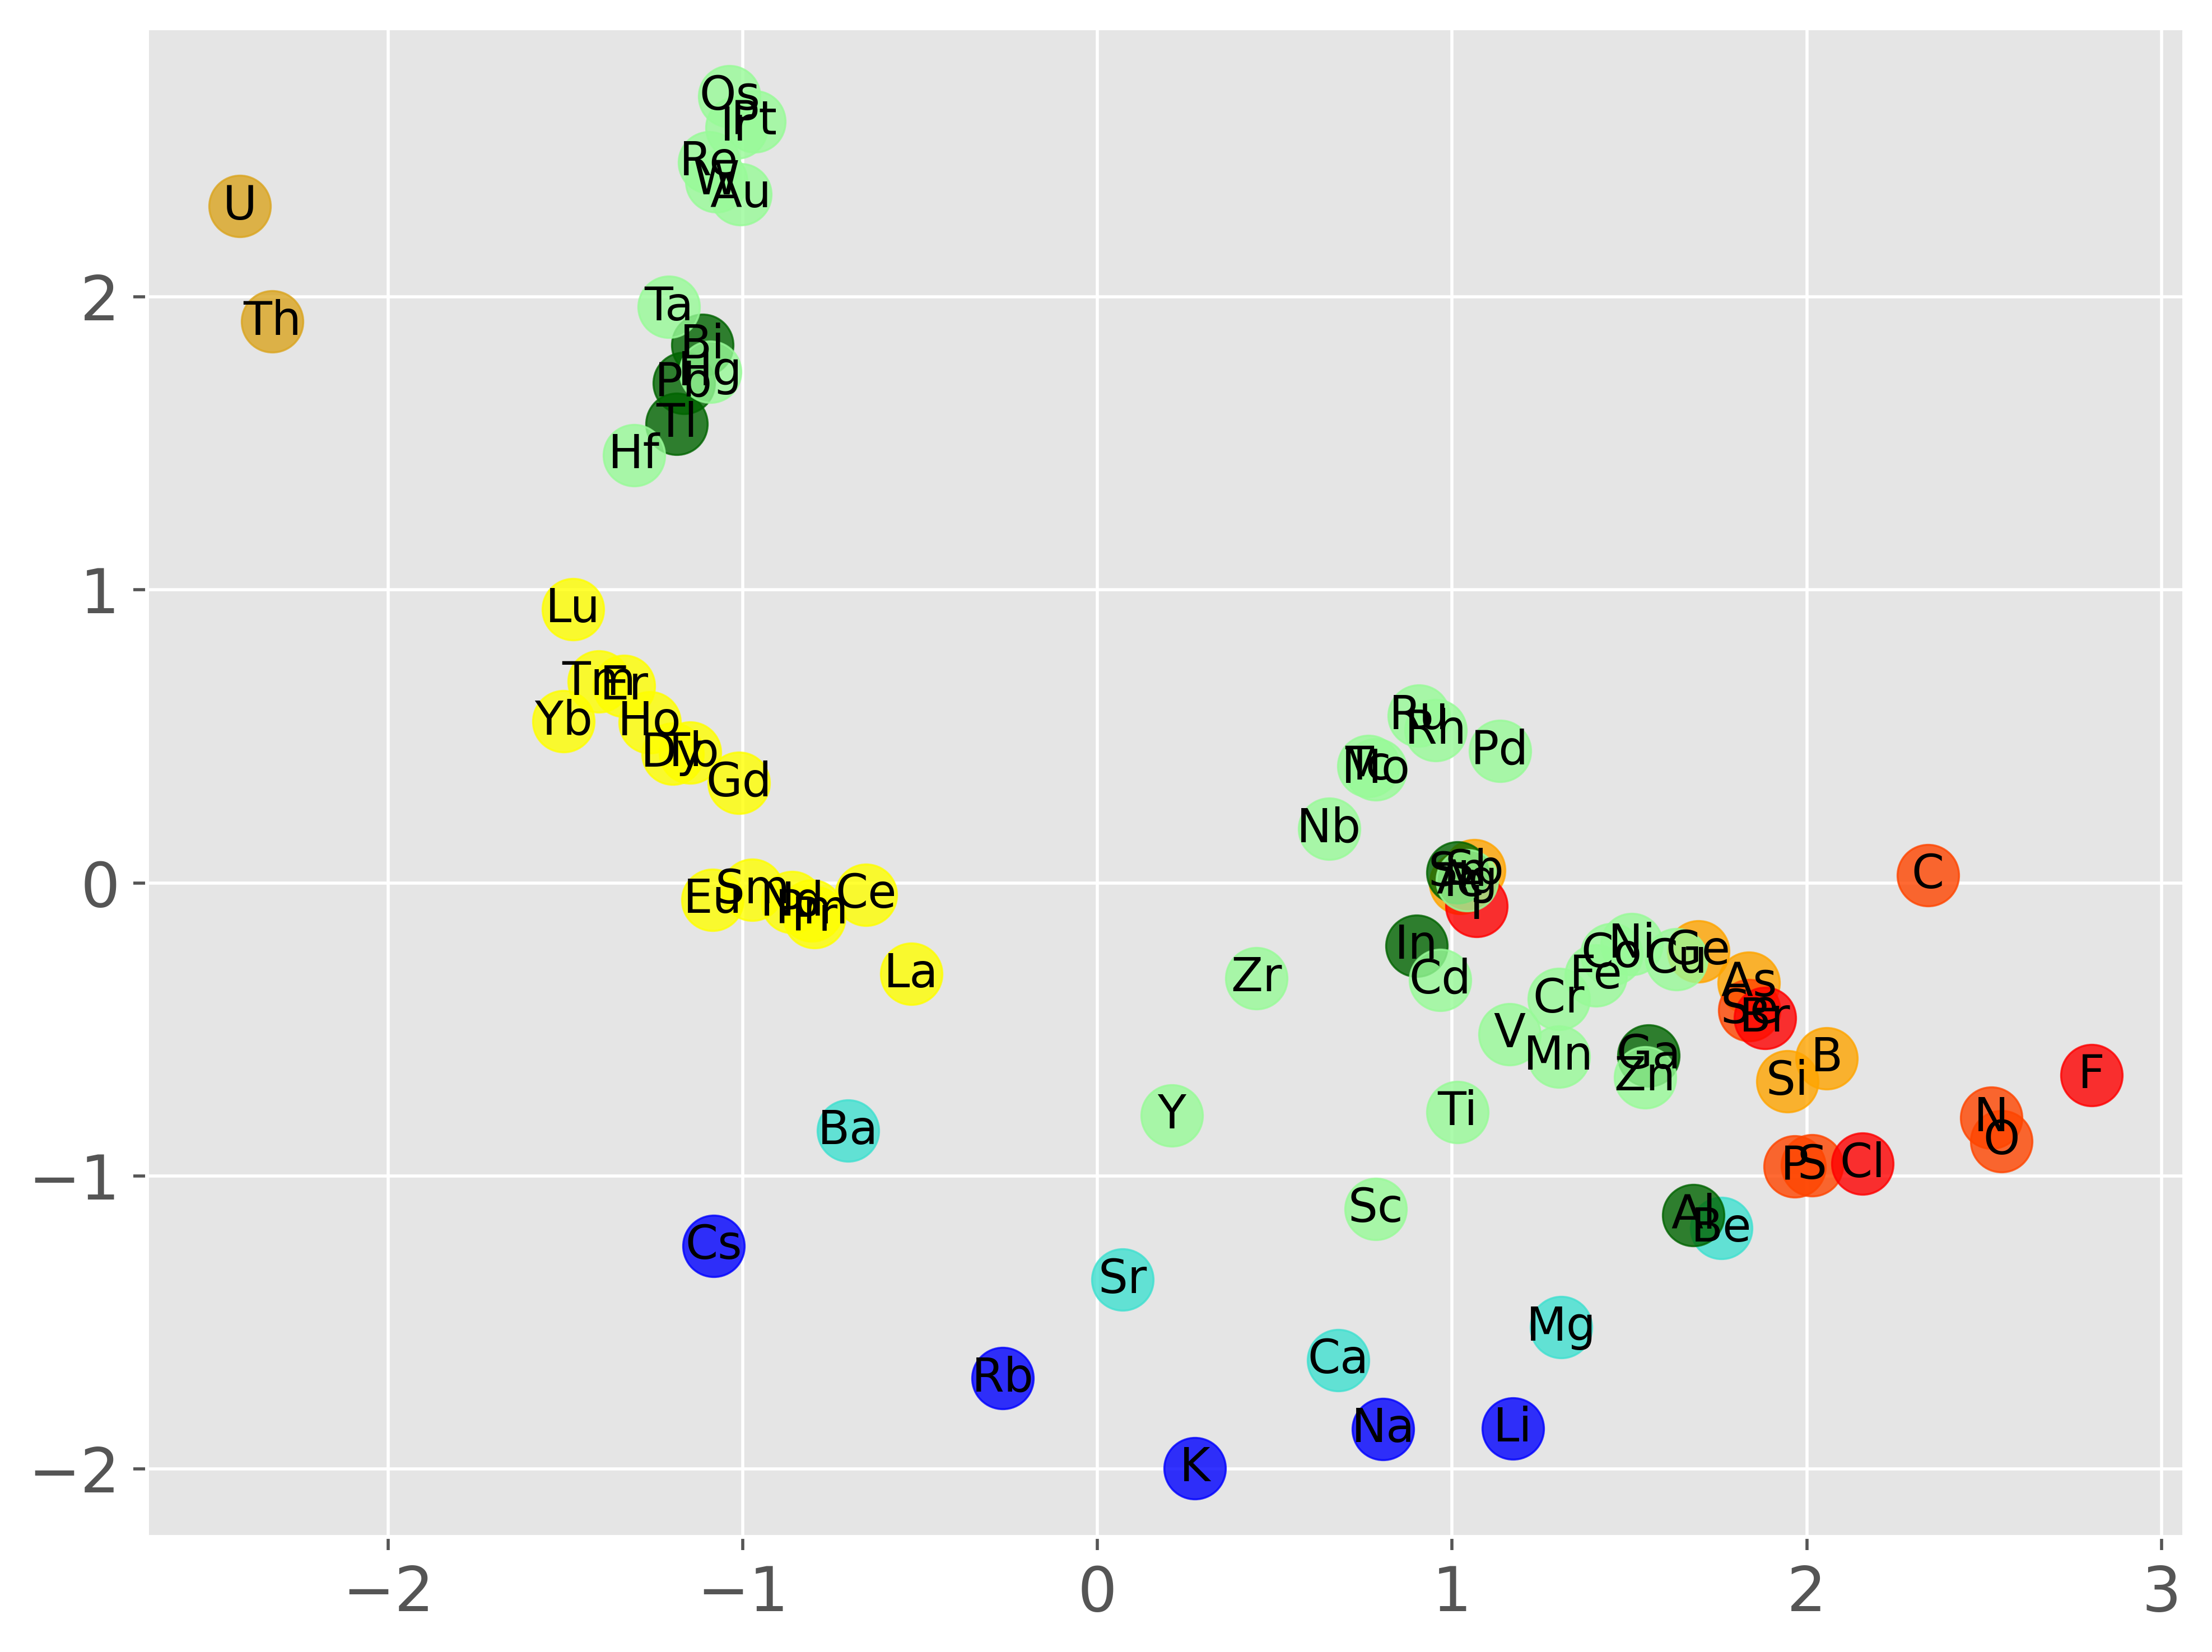

Coordinates saved to coordinates.xlsx


In [4]:
from models.projection import plot_elements_from_plsda_loadings

coords, merged_data = plot_elements_from_plsda_loadings(pls_loadings)